## 1. Importation des bibliothèques

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Configuration pour les graphiques
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

## 2. Génération du dataset

In [12]:
# Génération d'un dataset de classification avec 2 features pour visualisation
X, y = make_classification(
    n_samples=1000,        # Nombre d'échantillons
    n_features=2,          # 2 features pour visualisation 2D
    n_informative=2,       # Toutes les features sont informatives
    n_redundant=0,         # Pas de features redondantes
    n_classes=3,           # Nombre de classes
    n_clusters_per_class=1,
    random_state=42,
    class_sep=1.5          # Séparation entre les classes
)

print(f"Forme du dataset : {X.shape}")
print(f"Nombre d'échantillons : {X.shape[0]}")
print(f"Nombre de features : {X.shape[1]}")
print(f"Classes uniques : {np.unique(y)}")
print(f"Distribution des classes : {np.bincount(y)}")


Forme du dataset : (1000, 2)
Nombre d'échantillons : 1000
Nombre de features : 2
Classes uniques : [0 1 2]
Distribution des classes : [332 333 335]


## 3. Séparation en ensembles train/test

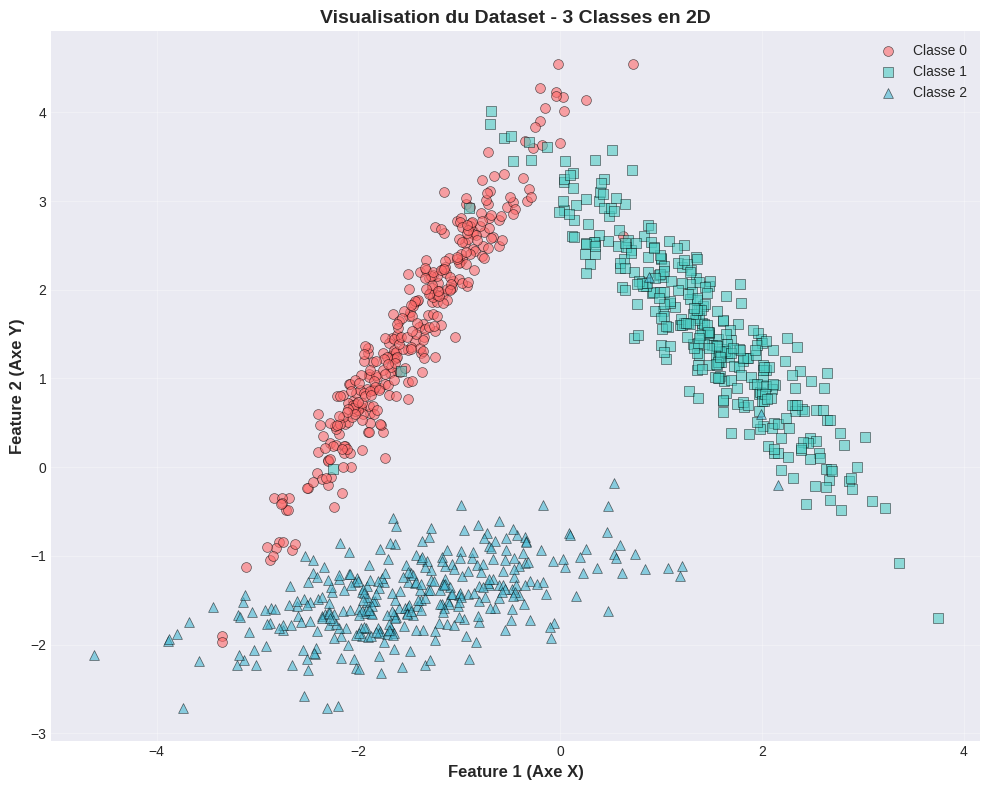

In [13]:
# Visualisation du dataset en 2D
plt.figure(figsize=(10, 8))
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
markers = ['o', 's', '^']

for i, class_label in enumerate(np.unique(y)):
    mask = y == class_label
    plt.scatter(X[mask, 0], X[mask, 1], 
                c=colors[i], 
                marker=markers[i],
                label=f'Classe {class_label}',
                alpha=0.6,
                s=50,
                edgecolors='black',
                linewidth=0.5)

plt.xlabel('Feature 1 (Axe X)', fontsize=12, fontweight='bold')
plt.ylabel('Feature 2 (Axe Y)', fontsize=12, fontweight='bold')
plt.title('Visualisation du Dataset - 3 Classes en 2D', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [14]:
# Séparation train/test (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Taille de l'ensemble d'entraînement : {X_train.shape[0]}")
print(f"Taille de l'ensemble de test : {X_test.shape[0]}")
print(f"Distribution train : {np.bincount(y_train)}")
print(f"Distribution test : {np.bincount(y_test)}")

Taille de l'ensemble d'entraînement : 800
Taille de l'ensemble de test : 200
Distribution train : [266 266 268]
Distribution test : [66 67 67]


## 4. Normalisation des données

In [15]:
# Normalisation avec StandardScaler (mean=0, std=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Statistiques avant normalisation (train):")
print(f"  Mean : {X_train.mean():.4f}")
print(f"  Std  : {X_train.std():.4f}")
print("\nStatistiques après normalisation (train):")
print(f"  Mean : {X_train_scaled.mean():.4f}")
print(f"  Std  : {X_train_scaled.std():.4f}")

Statistiques avant normalisation (train):
  Mean : 0.0358
  Std  : 1.7240

Statistiques après normalisation (train):
  Mean : -0.0000
  Std  : 1.0000


## 5. Entraînement du modèle KNN

In [16]:
# Création et entraînement du modèle KNN avec k=5
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_scaled, y_train)

print(f"Modèle KNN entraîné avec k={k} voisins")
print(f"Algorithme utilisé : {knn.algorithm}")
print(f"Métrique de distance : {knn.metric}")

Modèle KNN entraîné avec k=5 voisins
Algorithme utilisé : auto
Métrique de distance : minkowski


## 6. Prédictions

In [17]:
# Prédictions sur les ensembles train et test
y_train_pred = knn.predict(X_train_scaled)
y_test_pred = knn.predict(X_test_scaled)

print("Prédictions effectuées sur train et test")

Prédictions effectuées sur train et test


## 7. Évaluation avec plusieurs métriques

In [18]:
# Calcul des métriques
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print("=" * 50)
print(f"ÉVALUATION DU MODÈLE KNN (k={k})")
print("=" * 50)
print(f"\nAccuracy Train : {train_accuracy:.4f}")
print(f"Accuracy Test  : {test_accuracy:.4f}")
print(f"\nPrécision (Test) : {test_precision:.4f}")
print(f"Recall (Test)    : {test_recall:.4f}")
print(f"F1-Score (Test)  : {test_f1:.4f}")
print("\n" + "=" * 50)
print("\nRapport de classification détaillé :")
print("=" * 50)
print(classification_report(y_test, y_test_pred))

ÉVALUATION DU MODÈLE KNN (k=5)

Accuracy Train : 0.9875
Accuracy Test  : 0.9850

Précision (Test) : 0.9852
Recall (Test)    : 0.9850
F1-Score (Test)  : 0.9850


Rapport de classification détaillé :
              precision    recall  f1-score   support

           0       0.97      0.98      0.98        66
           1       1.00      0.97      0.98        67
           2       0.99      1.00      0.99        67

    accuracy                           0.98       200
   macro avg       0.99      0.98      0.98       200
weighted avg       0.99      0.98      0.98       200



## 9. Courbe d'accuracy en fonction de k

In [19]:
# Test de différentes valeurs de k
k_values = range(1, 31)
train_accuracies = []
test_accuracies = []

for k in k_values:
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train_scaled, y_train)
    
    train_acc = knn_temp.score(X_train_scaled, y_train)
    test_acc = knn_temp.score(X_test_scaled, y_test)
    
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

print(f"Nombre de valeurs de k testées : {len(k_values)}")
print(f"Meilleure accuracy (test) : {max(test_accuracies):.4f} pour k={k_values[np.argmax(test_accuracies)]}")

Nombre de valeurs de k testées : 30
Meilleure accuracy (test) : 0.9900 pour k=9


## 10. Visualisation de l'accuracy en fonction de k

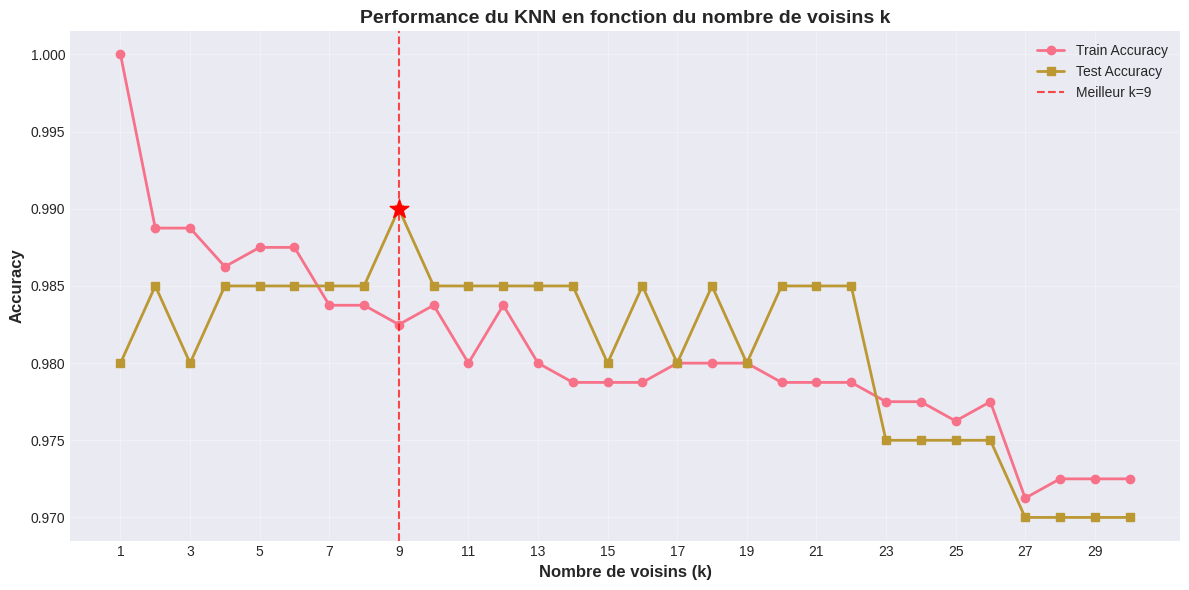


ANALYSE DE L'IMPACT DU PARAMÈTRE K
Meilleur k : 9
Accuracy (train) pour k=9 : 0.9825
Accuracy (test) pour k=9 : 0.9900


In [20]:
# Visualisation des résultats
plt.figure(figsize=(12, 6))

plt.plot(k_values, train_accuracies, marker='o', label='Train Accuracy', linewidth=2, markersize=6)
plt.plot(k_values, test_accuracies, marker='s', label='Test Accuracy', linewidth=2, markersize=6)

# Marquage du meilleur k
best_k = k_values[np.argmax(test_accuracies)]
best_acc = max(test_accuracies)
plt.axvline(x=best_k, color='red', linestyle='--', alpha=0.7, label=f'Meilleur k={best_k}')
plt.scatter([best_k], [best_acc], color='red', s=200, zorder=5, marker='*')

plt.xlabel('Nombre de voisins (k)', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy', fontsize=12, fontweight='bold')
plt.title('Performance du KNN en fonction du nombre de voisins k', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.xticks(range(1, 31, 2))
plt.tight_layout()
plt.show()

print(f"\n{'='*60}")
print(f"ANALYSE DE L'IMPACT DU PARAMÈTRE K")
print(f"{'='*60}")
print(f"Meilleur k : {best_k}")
print(f"Accuracy (train) pour k={best_k} : {train_accuracies[best_k-1]:.4f}")
print(f"Accuracy (test) pour k={best_k} : {best_acc:.4f}")
print(f"{'='*60}")